In [1]:
#Creating a Multi Output Model---->

In [2]:
#Energy Efficiency Data Set

In [1]:
# input_layer=Input(shape=(len(train.columns),))
# first_dense=Dense(units='128',activation='relu')(input_layer)
# second_dense=Dense(units='128',activation'relu')(first_dense)
# y1_output=Dense(units='1',name='y1_output')(second_dense)
# third_dense=Dense(units='64',activation='relu')(second_dense)
# y2_output=Dense(units='1',name='y2_output')(third_dense)



# model=Model(inputs=input_layer,outputs=[y1_output,y2_output])

In [2]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.utils.vis_utils import plot_model
import pydot

In [4]:
def format_output(data):
  y1=data.pop('Y1')
  y1=np.array(y1)
  y2=data.pop('Y2')
  y2=np.array(y2)
  return y1,y2

In [5]:
def norm(x):
  return (x-train_stats['mean'])/train_stats['std']

In [6]:
def plot_diff(y_true,y_pred,title):
  plt.scatter(y_true,y_pred)
  plt.title(title)
  plt.xlabel('True Values')
  plt.ylabel('Predictions')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim(plt.xlim())
  plt.ylim(plt.ylim())
  plt.plot([-100,100],[-100,100])
  plt.show()

In [7]:
def plot_metrics(metric_name,title,ylim=5):
  plt.title(title)
  plt.ylim(0,ylim)
  plt.plot(history.history[metric_name],color='blue',label=metric_name)
  plt.plot(history.history['val_'+ metric_name],color='green',label='val_'+metric_name)
  plt.show()

In [8]:
df=pd.read_excel('/content/ENB2012_data.xlsx')
df=df.sample(frac=1).reset_index(drop=True)

In [9]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.74,686.0,245.0,220.5,3.5,2,0.40,3,13.97,16.08
1,0.74,686.0,245.0,220.5,3.5,5,0.25,3,11.69,14.76
2,0.74,686.0,245.0,220.5,3.5,4,0.25,5,11.64,14.81
3,0.64,784.0,343.0,220.5,3.5,3,0.25,2,16.84,20.56
4,0.62,808.5,367.5,220.5,3.5,5,0.25,1,15.16,15.76


In [10]:
train,test=train_test_split(df,test_size=0.2)
train_stats=train.describe()

In [11]:
train_stats.pop('Y1')
train_stats.pop('Y2')
train_stats=train_stats.transpose()
train_Y=format_output(train)
test_Y=format_output(test)

In [12]:
norm_train_X=norm(train)
norm_test_X=norm(test)

In [13]:
#Define the model---->

In [14]:
input_layer=Input(shape=(len(train.columns),))
first_dense=Dense(units='128',activation='relu')(input_layer)
second_dense=Dense(units='128',activation='relu')(first_dense)

y1_output=Dense(units=1,name='y1_output')(second_dense)
third_dense=Dense(units='64',activation='relu')(second_dense)

y2_output=Dense(units='1',name='y2_output')(third_dense)

model=Model(inputs=input_layer,outputs=[y1_output,y2_output])
print(model.summary())

optimizer=tf.keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=optimizer,
              loss={'y1_output':'mse','y2_output':'mse'},
              metrics={'y1_output':tf.keras.metrics.RootMeanSquaredError(),
                       'y2_output':tf.keras.metrics.RootMeanSquaredError()})

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          1152        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          16512       dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 64)           8256        dense_1[0][0]                    
______________________________________________________________________________________________

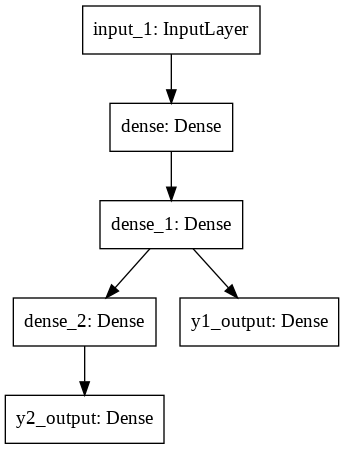

In [15]:
from tensorflow.keras.layers import Layer
model._layers=[
               layer for layer in model._layers if isinstance(layer,Layer)
]
plot_model(model)

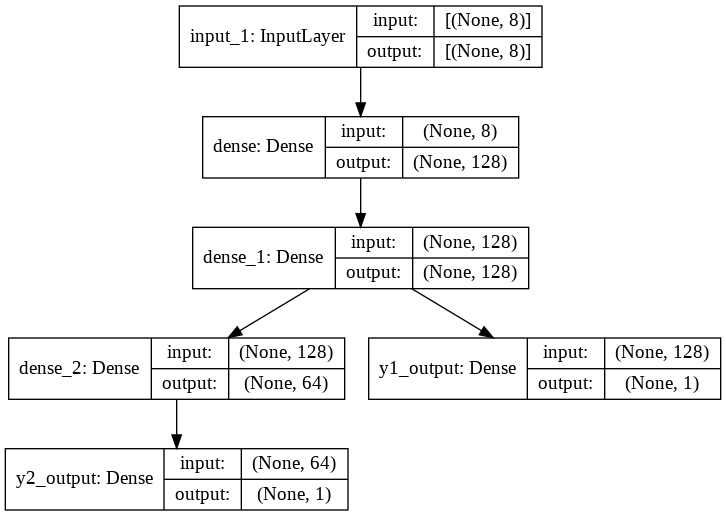

In [16]:
plot_model(model,show_shapes=True,show_layer_names=True,to_file='model.png')

In [17]:
history=model.fit(norm_train_X,train_Y,epochs=200,batch_size=10,validation_data=(norm_test_X,test_Y))

Epoch 1/200
62/62 [==============================] - 3s 10ms/step - loss: 550.9430 - y1_output_loss: 265.4656 - y2_output_loss: 285.4774 - y1_output_root_mean_squared_error: 15.6885 - y2_output_root_mean_squared_error: 16.2184 - val_loss: 36.0979 - val_y1_output_loss: 15.2823 - val_y2_output_loss: 20.8156 - val_y1_output_root_mean_squared_error: 3.9093 - val_y2_output_root_mean_squared_error: 4.5624
Epoch 2/200
62/62 [==============================] - 0s 3ms/step - loss: 33.4418 - y1_output_loss: 14.7267 - y2_output_loss: 18.7150 - y1_output_root_mean_squared_error: 3.8258 - y2_output_root_mean_squared_error: 4.2994 - val_loss: 27.5152 - val_y1_output_loss: 11.4329 - val_y2_output_loss: 16.0822 - val_y1_output_root_mean_squared_error: 3.3813 - val_y2_output_root_mean_squared_error: 4.0103
Epoch 3/200
62/62 [==============================] - 0s 3ms/step - loss: 37.2396 - y1_output_loss: 12.9508 - y2_output_loss: 24.2888 - y1_output_root_mean_squared_error: 3.5841 - y2_output_root_mean_s

In [19]:
loss,Y1_loss,Y2_loss,Y1_rmse,Y2_rmse=model.evaluate(x=norm_test_X,y=test_Y)
print("Loss= {},Y1_loss={},Y1_rmse={},Y2_loss={},Y2_rmse={}".format(loss,Y1_loss,Y1_rmse,Y2_loss,Y2_rmse))

5/5 [==============================] - 0s 3ms/step - loss: 1.5040 - y1_output_loss: 0.2920 - y2_output_loss: 1.2121 - y1_output_root_mean_squared_error: 0.5403 - y2_output_root_mean_squared_error: 1.1009
Loss= 1.5040429830551147,Y1_loss=0.29195746779441833,Y1_rmse=0.5403308868408203,Y2_loss=1.2120857238769531,Y2_rmse=1.100947618484497


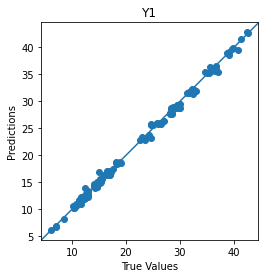

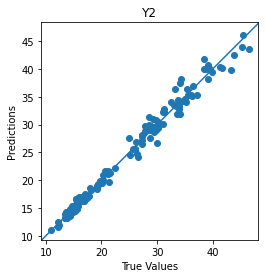

In [20]:
Y_pred=model.predict(norm_test_X)
plot_diff(test_Y[0],Y_pred[0],title='Y1')
plot_diff(test_Y[1],Y_pred[1],title='Y2')

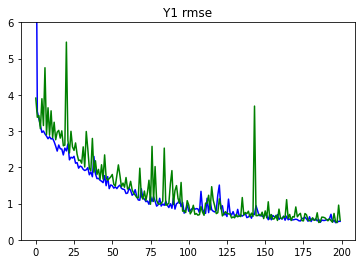

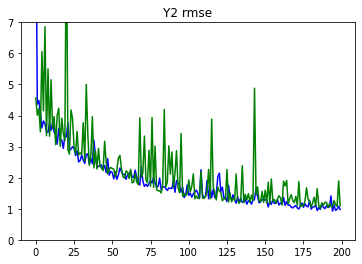

In [21]:
plot_metrics(metric_name='y1_output_root_mean_squared_error',title='Y1 rmse',ylim=6)
plot_metrics(metric_name='y2_output_root_mean_squared_error',title='Y2 rmse',ylim=7)